In [1]:
!pip uninstall opencv-python -y
# downgrade OpenCV a bit since some none-free features are not avilable
!pip install opencv-contrib-python==3.4.2.17

Uninstalling opencv-python-4.1.2.30:
  Successfully uninstalled opencv-python-4.1.2.30
     |████████████████████████████████| 30.6MB 109kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


##Get data

In [2]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# List .txt files in the root.
#
# Search query reference:
# https://developers.google.com/drive/v2/web/search-parameters
listed = drive.ListFile({'q': "title contains 'flow_files_anon012.zip'"}).GetList()
for flow_file in listed:
  print('title {}, id {}'.format(flow_file['title'], flow_file['id']))

listed = drive.ListFile({'q': "title contains 'anon012.zip'"}).GetList()
for video_file in listed:
  print('title {}, id {}'.format(video_file['title'], video_file['id']))

listed = drive.ListFile({'q': "title contains 'masks.zip'"}).GetList()
for mask_file in listed:
  print('title {}, id {}'.format(mask_file['title'], mask_file['id']))

# scripts
listed = drive.ListFile({'q': "title contains 'scripts.zip'"}).GetList()
for scripts in listed:
  print('title {}, id {}'.format(scripts['title'], scripts['id']))

title flow_files_anon003.zip, id 1B03i32eqUUcpvwDhNpKFbyDa28Lpn_MW
title anon003.zip, id 1m9ITnMoh-CA6PDlYt0oBT9r2y24Q6l_B
title masks.zip, id 1lBgLfSBD_8d0PxBSEI9uP7W3o-8bnZzW
title scripts.zip, id 1Nh2P7L_-b7RwY-WNg1op894T3GFdWBEQ


In [3]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


file_id = flow_file['id']

fname = os.path.join('/content', 'flow_files.zip')
print('downloading to {}'.format(fname))
f_ = drive.CreateFile({'id': file_id})
f_.GetContentFile(fname)


file_id = video_file['id']

fname = os.path.join('/content', 'video.zip')
print('downloading to {}'.format(fname))
f_ = drive.CreateFile({'id': file_id})
f_.GetContentFile(fname)


file_id = mask_file['id']

fname = os.path.join('/content', 'masks.zip')
print('downloading to {}'.format(fname))
f_ = drive.CreateFile({'id': file_id})
f_.GetContentFile(fname)

file_id = scripts['id']

fname = os.path.join('/content', 'scripts.zip')
print('downloading to {}'.format(fname))
f_ = drive.CreateFile({'id': file_id})
f_.GetContentFile(fname)

downloading to /content/flow_files.zip
downloading to /content/video.zip
downloading to /content/masks.zip
downloading to /content/scripts.zip


In [4]:
!unzip flow_files.zip
!unzip masks.zip
!unzip video.zip
!unzip scripts.zip

Archive:  flow_files.zip
   creating: flow_files_anon003/
  inflating: flow_files_anon003/000000.flo  
  inflating: flow_files_anon003/000001.flo  
  inflating: flow_files_anon003/000002.flo  
  inflating: flow_files_anon003/000003.flo  
  inflating: flow_files_anon003/000004.flo  
  inflating: flow_files_anon003/000005.flo  
  inflating: flow_files_anon003/000006.flo  
  inflating: flow_files_anon003/000007.flo  
  inflating: flow_files_anon003/000008.flo  
  inflating: flow_files_anon003/000009.flo  
  inflating: flow_files_anon003/000010.flo  
  inflating: flow_files_anon003/000011.flo  
  inflating: flow_files_anon003/000012.flo  
  inflating: flow_files_anon003/000013.flo  
  inflating: flow_files_anon003/000014.flo  
  inflating: flow_files_anon003/000015.flo  
  inflating: flow_files_anon003/000016.flo  
  inflating: flow_files_anon003/000017.flo  
  inflating: flow_files_anon003/000018.flo  
  inflating: flow_files_anon003/000019.flo  
  inflating: flow_files_anon003/000020.flo

In [5]:
!pip install flowiz -U

     |████████████████████████████████| 2.5MB 19.6MB/s 
     |████████████████████████████████| 92kB 12.4MB/s 
     |████████████████████████████████| 5.6MB 51.9MB/s 
     |████████████████████████████████| 245kB 58.2MB/s 
     |████████████████████████████████| 163kB 61.2MB/s 
  Created wheel for eel: filename=Eel-0.14.0-cp37-none-any.whl size=17462 sha256=39f5d8a3a8c71d6722d248d36ca689176f61335d4c8d19ab3e422e88486b978a
  Stored in directory: /root/.cache/pip/wheels/68/a8/f9/0bb7b895584b80f4beabebfb8dcfdb8c7b0db2420b9c2a4821
  Created wheel for bottle-websocket: filename=bottle_websocket-0.2.9-cp37-none-any.whl size=2347 sha256=c47bc6e2af01d4304dc059a8729cd3496b985921517ba6533d58f3880d68da25
  Stored in directory: /root/.cache/pip/wheels/1e/fd/80/af47541f053f14f4e5fd5927c91a7615358826429ba036152d
Successfully built eel bottle-websocket


In [6]:
import flowiz as fz

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
cv2.ocl.setUseOpenCL(False)
import sys
from PIL import Image
from pathlib import Path

In [8]:
import scripts.flow_file_processing as fp
import scripts.registration_processing as rp
import scripts.visualize as vis
import scripts.transformation_processing as tp
import scripts.ssim_processing as sp
import scripts.utility_processing as up
import scripts.config_project as config_project

In [9]:
from google.colab.patches import cv2_imshow

In [10]:
transformation = "Affine"
video_name = "anon012"
n = 111

is_exact = False
if is_exact:
  seq_config = config_project.seq_exact
else:
  seq_config = config_project.seq_extra

In [11]:
def inputAndVisualizeStitchPair(srcImgPath, destImgPath, showImages=True): 
  '''
    Inputs: srcImgPath, destImgPath 
    srcImgPath : path to the image been transformed, usually the new frame seen ->str
    destImgPath : path to the image that acts as destination(src image is trasformed to it), usually the old frame->str
    Output: [srcImg, destImg] -> list
    srcImg: 256x256 representation of srcImage ->ndarray
    destImg: 256x256 representation of destImage ->ndarray
  '''
  srcImg = cv2.imread(srcImgPath)
  srcImg = cv2.cvtColor(srcImg,cv2.COLOR_BGR2RGB)
  srcImg_gray = cv2.cvtColor(srcImg, cv2.COLOR_RGB2GRAY)

  destImg = cv2.imread(destImgPath)
  destImg = cv2.cvtColor(destImg,cv2.COLOR_BGR2RGB)
  destImg_gray = cv2.cvtColor(destImg, cv2.COLOR_RGB2GRAY)

  if showImages:
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, constrained_layout=False, figsize=(10,4))
    ax1.imshow(destImg, cmap="gray")
    ax1.set_xlabel("dest image", fontsize=14)

    ax2.imshow(srcImg, cmap="gray")
    ax2.set_xlabel("Src image (Image to be transformed)", fontsize=14)
    
    plt.show()

  return [srcImg, destImg]

In [12]:
def inputAndFormatFlowfile(flowPath):
  '''
  Input: flowPath
  flowpath: path to the .flo file between two images ->str
  Output: flow
  flow: the formated optical_flow -> ndArray of heightxbreathx2 of the image sizes 
  '''
  path = Path(flowPath) 
  with path.open(mode='r') as flo:
      np_flow = np.fromfile(flo, np.float32)
      # print(np_flow.shape)

  with path.open(mode='r') as flo:
    tag = np.fromfile(flo, np.float32, count=1)[0]
    width = np.fromfile(flo, np.int32, count=1)[0]
    height = np.fromfile(flo, np.int32, count=1)[0]

    # print('tag', tag, 'width', width, 'height', height)

    nbands = 2
    tmp = np.fromfile(flo, np.float32, count= nbands * width * height)
    flow = np.resize(tmp, (int(height), int(width), int(nbands)))
    return flow

In [13]:
def pointCorrespondenceFromOpticalFlow(flow, padding):
  '''
  Input: flow
  flow: the formatted optical flow file -> ndarray length,breadth,2
  padding: padding to add to destImg
  OutPut: [ptsA and ptsB] -> list
  ptsA: point correspondences in the destImg (original) -> ndarray length*breadth,2
  ptsB: point correspondences in the srcImg(new, been transformed) -> ndarray length*breadth,2
  '''
  ptsA = np.zeros(flow.shape)
  ptsB = np.zeros(flow.shape)

  for i in range(ptsA.shape[0]):
    for j in range(ptsA.shape[1]):
      ptsA[i,j] = np.array([i,j], dtype=np.float) + np.array([padding,padding])
      ptsB[i,j] = np.array([i,j])  +  (np.array(flow[j, i]))

  ptsA = np.reshape(ptsA, (-1, 2))
  ptsB = np.reshape(ptsB, (-1, 2))
  return [ptsA, ptsB]

In [14]:
def findTransformation(ptsA, ptsB, threshold=1):
  '''
    ptsA: point correspondences in the destImg (original) -> ndarray length*breadth,2
    ptsB: point correspondences in the srcImg(new, been transformed) -> ndarray length*breadth,2
    threshold: ransac threshold. 
    Output:
    H - homography
    status - mask of ransac accepted or rejected
  '''
  if transformation == "Homography":
    (H, status) = cv2.findHomography(ptsB, ptsA, cv2.RANSAC, threshold)
  elif transformation == "Affine":
    (H, status) = cv2.estimateAffine2D(ptsB, ptsA, method = cv2.RANSAC, ransacReprojThreshold = threshold)
  return [H, status]

In [15]:
def visualizeStitch(srcImg, destImg, H, padding, showImages=True):
  '''
  srcImg: 256x256 representation of srcImage ->ndarray
  destImg: 256x256 representation of destImage ->ndarray
  H - homography
  '''
  ht, wd, cc= destImg.shape

  ww = wd + (2*padding)
  hh = ht + (2*padding)

  xx = (ww - wd) // 2
  yy = (hh - ht) // 2

  if transformation == "Homography":
    result = cv2.warpPerspective(srcImg, H, (ww, hh))
  elif transformation == "Affine":
    result = cv2.warpAffine(srcImg, H, (ww, hh))

  result[yy:yy+ht, xx:xx+wd] = destImg

  if showImages:
    plt.figure(figsize=(10,4))
    plt.imshow(result)

    plt.show()

In [16]:
image_width = 256
def VisualizeOutliers(destImgPath, status, showImages):
  if showImages:
    ransac_fail = np.where(np.any(status==0, axis=1))[0]
    convert_to_pixel = lambda t: [t//image_width, t%image_width]
    outlier_pixels = np.array([convert_to_pixel(p) for p in ransac_fail])
    # print(outlier_pixels)
    destImg = Image.open(destImgPath)
    fig = plt.figure(figsize=(10,4))
    plt.xlabel("outliers",fontsize=14)
    if (outlier_pixels.size):
      plt.plot(outlier_pixels[:, 1],outlier_pixels[:, 0],'r.')
    plt.imshow(destImg)

In [17]:
def getHomographyAndStitch(srcImgPath, destImgPath, flowpath, padding, threshold, showImages = True):

  '''
  Inputs: srcImgPath, destImgPath 
  srcImgPath : path to the image been transformed, usually the new frame seen ->str
  destImgPath : path to the image that acts as destination(src image is trasformed to it), usually the old frame->str
  flowpath: path to the .flo file between two images ->str
  flow: the formatted optical flow file -> ndarray length,breadth,2
  padding: padding to add to destImg
  '''
  srcImg, destImg = inputAndVisualizeStitchPair(srcImgPath, destImgPath, showImages)
  flow = inputAndFormatFlowfile(flowPath)
  ptsA, ptsB =  pointCorrespondenceFromOpticalFlow(flow, padding)
  H, status = findTransformation(ptsA, ptsB, threshold)
  visualizeStitch(srcImg, destImg, H, padding, showImages)
  VisualizeOutliers(destImgPath, status, showImages)

  return H

#### Use functions to perform first stitch.

In [18]:
IMG_SHAPE_STANDARD = (448,448)

In [19]:
from os import listdir

In [20]:
fullImgDirPath = "/content/" + video_name
flowFileDirPath = "/content/flow_files_" + video_name + "/"

In [21]:
flowPaths =  [ flowFileDirPath + '/' + f  for f  in sorted(listdir(flowFileDirPath))]
fullImgPaths =  [ fullImgDirPath + '/' + f  for f  in sorted(listdir(fullImgDirPath))]

In [22]:
up.resize_all_images(fullImgDirPath, fullImgDirPath, IMG_SHAPE_STANDARD)

In [23]:
fullImgPaths = config_project.get_img_paths(fullImgPaths, video_name, is_exact)
flowPaths = config_project.get_img_paths(flowPaths, video_name, is_exact)

In [24]:
len(fullImgPaths)

150

In [25]:
len(flowPaths)

150

# Test here


In [26]:
fullImgPaths[n]

'/content/anon003/anon003_12772.png'

In [27]:
flowPaths[n]

'/content/flow_files_anon003//000121.flo'

In [28]:
srcImgPath = fullImgPaths[n+1]
destImgPath = fullImgPaths[n]
showImage = True

srcImg = cv2.imread(srcImgPath)
srcImg = cv2.cvtColor(srcImg,cv2.COLOR_BGR2RGB)
srcImg_gray = cv2.cvtColor(srcImg, cv2.COLOR_RGB2GRAY)

destImg = cv2.imread(destImgPath)
destImg = cv2.cvtColor(destImg,cv2.COLOR_BGR2RGB)
destImg_gray = cv2.cvtColor(destImg, cv2.COLOR_RGB2GRAY)


# flow_farneback = cv2.calcOpticalFlowFarneback(destImg_gray,srcImg_gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
flow_flownet = inputAndFormatFlowfile(flowPaths[n])

In [29]:
img_flownet = fz.convert_from_flow(flow_flownet)

In [30]:
mask_path = '/content/masks/' + video_name + '_mask.png'

In [31]:
v_crop_top = seq_config[video_name]["v_crop_top"]
v_crop_bottom = seq_config[video_name]["v_crop_bottom"]

mask_im = fp.get_mask_im(fullImgPaths, mask_path, v_crop_top, v_crop_bottom)

In [32]:
img_flownet = cv2.bitwise_and(img_flownet, img_flownet, mask=mask_im)

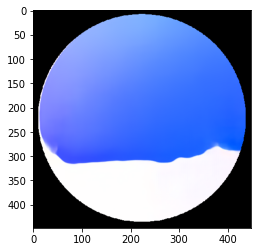

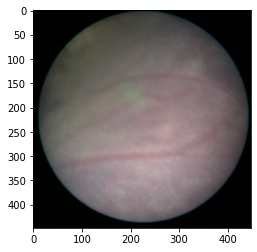

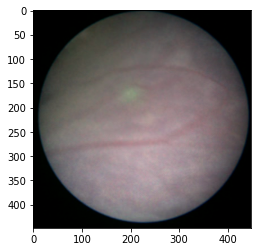

In [33]:
vis.visualizeImg(img_flownet)
vis.visualizeImg(destImg)
vis.visualizeImg(srcImg)
# plt.figure(figsize=(20,8))
# fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
# fig.set_figheight(15)
# fig.set_figwidth(15)
# ax1.imshow(destImg)
# ax2.imshow(srcImg)
# ax3.imshow(img_flownet)

In [34]:
# Create the old matrix to feed to LK, instead of goodFeaturesToTrack
# height, width = destImg_gray.shape
# all_pixels = np.nonzero(destImg_gray)[::-1]
# all_pixels = tuple(zip(*all_pixels))
# all_pixels = np.vstack(all_pixels).reshape(-1, 1, 2).astype("float32")

# # lk_params = dict(winSize=(15, 15), maxLevel=2, criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03)

# lk_params = dict( winSize  = (15,15),
#                   maxLevel = 2,
#                   criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

# # Calculate Optical Flow
# p1, st, err = cv2.calcOpticalFlowPyrLK(destImg_gray, srcImg_gray, all_pixels, None, **lk_params)
# all_pixels = all_pixels.reshape(height, width, 2)
# p1 = p1.reshape(height, width, 2)

# # Flow vector calculated by subtracting new pixels by old pixels
# flow_lk = p1 - all_pixels


In [35]:
# inst = cv2.optflow.createOptFlow_DeepFlow()
# flow_deepflow = inst.calc(destImg_gray, srcImg_gray, None)